In [1]:
from IPython.display import display, Image, HTML
import sys, os
module_path = os.path.abspath(os.path.join('../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)

print(sys.path)
import repository

['/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/tomk/environment/devpy/lib/python3.10/site-packages', '/home/tomk/Documents/Coding/gitHub/daglit/src', '/home/tomk/Documents/Coding/gitHub/datamodels/src']


* Owlready2 * WARNING: ObjectProperty http://www.tkltd.org/ontologies/serialization#MappingMetaTarget belongs to more than one entity types: [owl.AnnotationProperty, owl.ObjectProperty, owl.topObjectProperty]; I'm trying to fix it...
* Owlready2 * Running HermiT...
    java -Xmx2000M -cp /home/tomk/environment/devpy/lib/python3.10/site-packages/owlready2/hermit:/home/tomk/environment/devpy/lib/python3.10/site-packages/owlready2/hermit/HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:////tmp/tmpsnsz36wt


Serialization.Meta [Serialization.SerializationMetaData]
Serialization.Serialization [Serialization.SerializationSpecs]
Serialization.Mapping [Serialization.SerializationSpecs]
Serialization.TranslationMapping [Serialization.SerializationSpecs]
Serialization.MappingKVPair [Serialization.SerializationSpecs]
Serialization.MetaClass [Serialization.Meta]
Serialization.MetaDataProperty [Serialization.Meta]
Serialization.MetaProperty [Serialization.Meta]
Serialization.MetaStaticProperty [Serialization.Meta]
Serialization.BatchDefinition [Serialization.SerializationSpecs]
Serialization.SerializationSpecs [Serialization.SerializationMetaData]
Serialization.BatchNode [Serialization.DataLoad]
Serialization.DataLoad [Serialization.SerializationMetaData]
Serialization.SerializationMetaData [owl.Thing]
Serialization.DataPropertyMapping [Serialization.Mapping]
Serialization.EntityMapping [Serialization.Mapping]
Serialization.JobNode [Serialization.DataLoad]
Serialization.PropertyMapping [Serializati

* Owlready2 * HermiT took 0.7072985172271729 seconds
* Owlready * (NB: only changes on entities loaded in Python are shown, other changes are done but not listed)


In [54]:
from rdflib import URIRef, Graph, Namespace, Literal
from rdflib.query import Result
import pandas as pd
import re

store_type="jena"
#store_type="memory"
repo = repository.Repository(store_type=store_type)


In [3]:
q="""
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX owl: <http://www.w3.org/2002/07/owl#> 

select ?s ?p ?o
    WHERE
    {GRAPH ?g { ?s ?p ?o. }
FILTER (?g=<http://www.tkltd.org/graphs/99d6caf3bfed4748b61136f5ecb89360>)
}
"""

rs=repo.ds.query(q)
pd.DataFrame([r for r in rs])

,0,1,2
0,http://www.tkltd.org/ontologies/df9a50495b5149...,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.tkltd.org/ontologies/datamodel#Model
1,http://www.tkltd.org/ontologies/df9a50495b5149...,http://www.w3.org/2000/01/rdf-schema#label,Inventory
2,http://www.tkltd.org/ontologies/df9a50495b5149...,http://www.tkltd.org/ontologies/serialization#...,Inventory.Inventory
3,http://www.tkltd.org/ontologies/df9a50495b5149...,http://www.tomk.org/ontologies/datamodel#Contains,http://www.tkltd.org/ontologies/25ac78e9ccdf4b...
4,http://www.tkltd.org/ontologies/df9a50495b5149...,http://www.tomk.org/ontologies/datamodel#Contains,http://www.tkltd.org/ontologies/e82395098d9b40...
...,...,...,...
118,http://www.tkltd.org/ontologies/d142cccec6b14a...,http://www.tkltd.org/ontologies/datamapping#Ma...,http://www.tkltd.org/ontologies/e82395098d9b40...
119,http://www.tkltd.org/ontologies/d142cccec6b14a...,http://www.tkltd.org/ontologies/datamapping#Ma...,http://www.tkltd.org/ontologies/de3e42edd8ce48...
120,http://www.tkltd.org/ontologies/d142cccec6b14a...,http://www.tkltd.org/ontologies/datamapping#Ma...,http://www.tkltd.org/ontologies/dae1b7b1305049...
121,http://www.tkltd.org/ontologies/d142cccec6b14a...,http://www.tkltd.org/ontologies/datamapping#Ma...,http://www.tkltd.org/ontologies/d4926bf345f84f...


In [4]:
import graphviz
import io
from rdflib.tools.rdf2dot import rdf2dot
import pydotplus

In [5]:
dot = graphviz.Digraph(comment="test")

In [6]:
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    #print(stream.getvalue())
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()

    display(Image(png))

In [7]:
def t2rdflibg(triples): #triples to rdflib graph
    g = Graph()
    for t in triples:
        g.add(t)
    return g

In [8]:
g=t2rdflibg(rs)

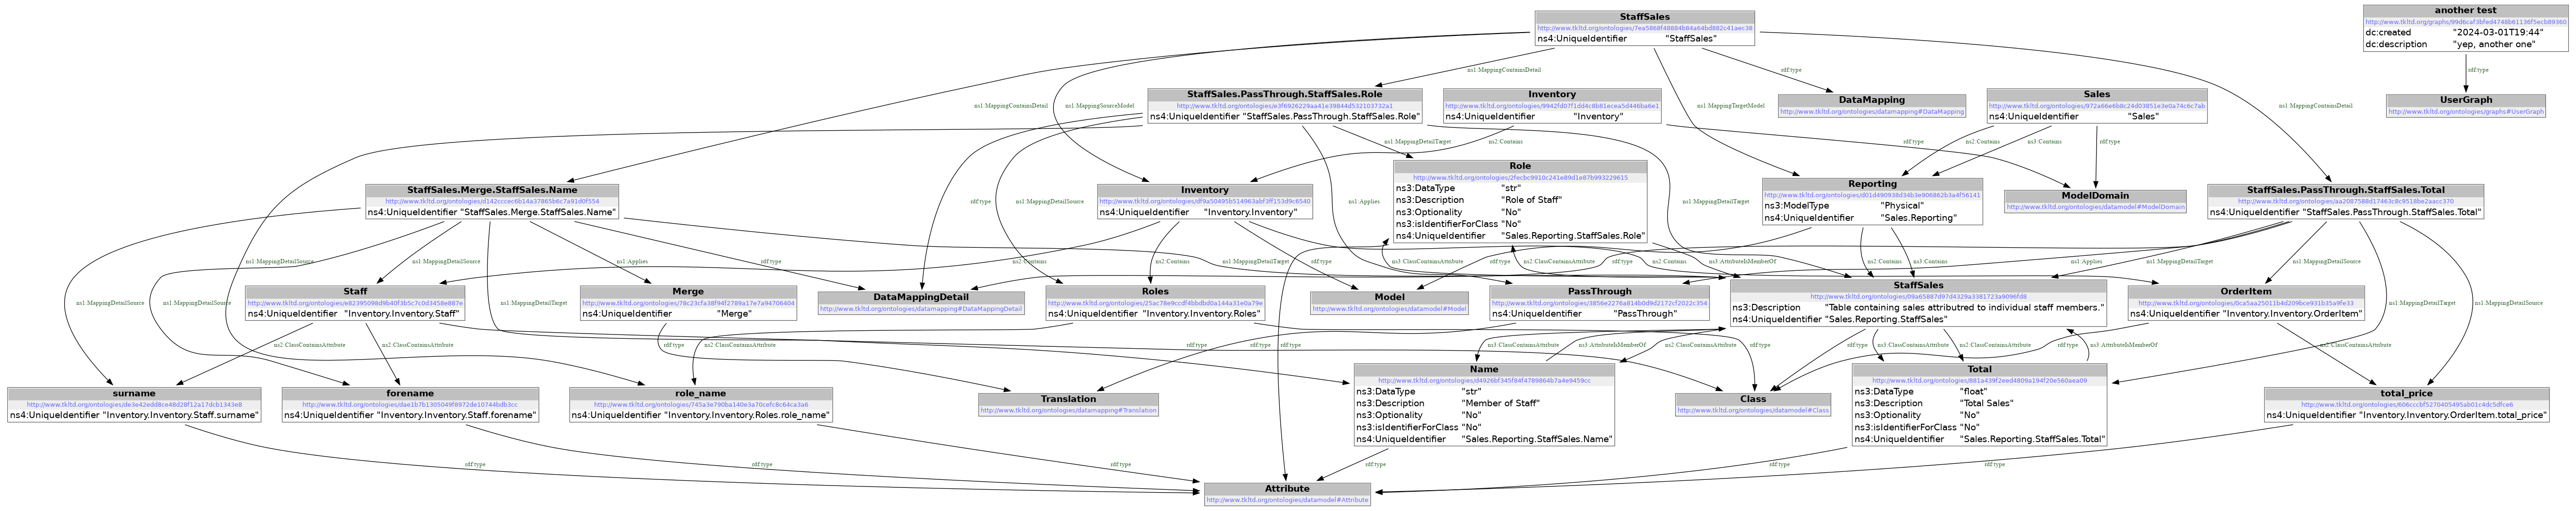

In [9]:
visualize(g)

In [10]:
stream = io.StringIO()
rdf2dot(g, stream, opts = {display})
#print(stream.getvalue())
dg = pydotplus.graph_from_dot_data(stream.getvalue())

In [11]:
print(stream.getvalue())

digraph { 
 node [ fontname="DejaVu Sans" ] ; 
	node0 -> node1 [ color=BLACK, label=< <font point-size='10' color='#336633'>ns1:MappingSourceModel</font> > ] ;
	node2 -> node3 [ color=BLACK, label=< <font point-size='10' color='#336633'>ns1:MappingDetailSource</font> > ] ;
	node5 -> node6 [ color=BLACK, label=< <font point-size='10' color='#336633'>rdf:type</font> > ] ;
	node4 -> node1 [ color=BLACK, label=< <font point-size='10' color='#336633'>ns2:Contains</font> > ] ;
	node5 -> node8 [ color=BLACK, label=< <font point-size='10' color='#336633'>ns1:Applies</font> > ] ;
	node9 -> node10 [ color=BLACK, label=< <font point-size='10' color='#336633'>ns2:ClassContainsAttribute</font> > ] ;
	node2 -> node11 [ color=BLACK, label=< <font point-size='10' color='#336633'>ns1:MappingDetailTarget</font> > ] ;
	node0 -> node12 [ color=BLACK, label=< <font point-size='10' color='#336633'>ns1:MappingContainsDetail</font> > ] ;
	node8 -> node14 [ color=BLACK, label=< <font point-size='10' color='#33

In [12]:
#assert False

In [13]:
# That's the rdf2dot layout for a single table that's part of a model, let's try the same thing for multiple tables per model.


In [14]:
# Template for fetching property details for a datamodel's class

q_template={ "self" : "PARAMETER(@selfuri)",
    "contents" : {  "label" : "SPARQL(SELECT ?label WHERE {@selfuri <http://www.w3.org/2000/01/rdf-schema#label> ?label})", 
                    "type" : "SPARQL(SELECT ?type WHERE {@selfuri <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?type})",
                    "description" : "SPARQL(SELECT ?description WHERE {@selfuri <http://www.tkltd.org/ontologies/datamodel#Description> ?description})",
                    "identifier" : "SPARQL(SELECT ?identifier WHERE {@selfuri <http://www.tkltd.org/ontologies/serialization#UniqueIdentifier> ?identifier})",
                    "@attributeuri" : "SPARQL(SELECT ?attributeuri WHERE {@selfuri <http://www.tkltd.org/ontologies/datamodel#ClassContainsAttribute> ?attributeuri})",
                    "attributes" : { 
                        "self" : "PARAMETER(@attributeuri)",
                        "contents" : {
                            "label" : "SPARQL(SELECT ?label WHERE {@attributeuri <http://www.w3.org/2000/01/rdf-schema#label> ?label})", 
                            "datatype" : "SPARQL(SELECT ?datatype WHERE {@attributeuri <http://www.tkltd.org/ontologies/datamodel#DataType> ?datatype})",
                            "nulls" : "SPARQL(SELECT ?nulls WHERE {@attributeuri <http://www.tkltd.org/ontologies/datamodel#NullsOptional> ?nulls})",
                            "optionality" : "SPARQL(SELECT ?optionality WHERE {@attributeuri <http://www.tkltd.org/ontologies/datamodel#Optionality> ?optionality})",
                            "pk" : "SPARQL(SELECT ?pk WHERE {@attributeuri <http://www.tkltd.org/ontologies/datamodel#isIdentifierForClass> ?pk})",
                            "identifier" : "SPARQL(SELECT ?identifier WHERE {@attributeuri <http://www.tkltd.org/ontologies/serialization#UniqueIdentifier> ?identifier})",
                            "description" : "SPARQL(SELECT ?description WHERE {@attributeuri <http://www.tkltd.org/ontologies/datamodel#Description> ?description})",



                        }
                    }

}
    

}


In [15]:
def to_text(something, context=None):
    if context is None:
        if isinstance(something, (URIRef, Literal)):
            return something.toPython()
        elif isinstance(something, str):
            return something
        else:
            return str(something)
    elif context=="sparql":
        if isinstance(something, (URIRef, Literal)):
            return something.n3()
        elif isinstance(something, str):
            return something
        else:
            return str(something)

def multi_replace(text, replace_parms, parameters):
    for p in replace_parms:
        text=text.replace(p, to_text(parameters.get(p, None), context="sparql"))
    return text

def resolve_content(graph, content, parameters, scope):
    # Given a string, unpack and resolve to some list of results
    # parameters hosts global list of parameter options, while
    # scope contains the current working values being processed
    value_type_rx=re.compile("(SPARQL|PARAMETER)\((.*)\)")
    match_groups=value_type_rx.findall(content)
    if match_groups is not None and len(match_groups)>0:
        m_type, m_value = match_groups[0]
    if m_type.lower()=="parameter":
        r_val = [m_value,parameters.get(m_value, None)]
        return r_val
    elif m_type.lower()=="sparql":
        get_parms_rx=re.compile("\@[\w]*")
        replace_parms = get_parms_rx.findall(m_value)
        query = multi_replace(m_value, replace_parms, scope)
        rs =  g.query(query)
        return [v[0] for v in list(rs)]
    

def qt_dict(graph, template, parameters, scope=None):
    """Run through a node_properties extract template, each section containing a
    self and contents section. 
    The self section defines a key value which is drawn from parameters and assigned to
    the scope. """
    return_d = dict()
    if scope is None:
        scope=dict()
    self_key_content = template.get('self', None)
    
    self_key_name, self_key_list=resolve_content(graph, self_key_content, parameters, scope)
    for key in self_key_list:
        return_d[key]=dict()
        scope[self_key_name]=key
        for header, specification in template.get('contents', {}).items():
            if not isinstance(specification, dict):
                resolved_content=resolve_content(graph, specification, parameters, scope)
                return_d[key][header]=resolved_content
                if header[0]=="@":
                    parameters={**parameters, **{header:resolved_content}}
            else:
                return_d[key][header]=qt_dict(graph, template.get('contents').get(header), parameters, scope)
    return return_d


In [16]:
def scorechar_(c, loc, target, bchars):
    if option_over is None:
        option_over=False
    score=0
    adj=1/target
    neg=0

    if c in bchars:
        if loc>target:
            neg=((loc-target)**3)
        score=1/(((loc-target)**2)+1+neg)
    else:
        score = 1/(((loc-target)**2)+1)*(adj**2)
    
    return score


def scoring_function(x,t,f,o):
    if o:
        if x<t:
            score = x * (0.6*t)
        else:
            score = 0
    else:
        if x<t:
            score = x ** 2
        elif x<(t+f):
            score = (((2*t)-x)**2)
        else:
            score = 0

    if score < 0:
        score=0
    return score/(t**2)

def scorechar(c, loc, target, bchars):

    score=0
    adj=1/target
    neg=0
    t=int(target*0.85)
    f=target-t
    if c in bchars:
        if loc>target:
            neg=((loc-target)**3)
        score=scoring_function(loc,t,f,False)
        b=True
    else:
        score = scoring_function(loc,t,f,True)
        b=False
    
    return (b, score)


def wordwrap(text, target_length):
    linespace=1
    breakchars=" ,.-"
    delchars="" # "\n\t"
    for c in delchars:
        text=text.replace(c, " ")
    best_split=0
    in_texts=text.split("\n")
    texts=[]
    finished=False
    for qtext in in_texts:
        s_text=""+"".join([t for t in qtext])
        print(s_text)
        while not finished and len(s_text)!=0:
            osps = [scorechar(c,e,target_length, breakchars) for e,c in enumerate(s_text)]
            
            
            best_split = osps.index(max(osps))
            bp_score = max(osps)
            
            if len(s_text)==0 or best_split==0 or target_length >=len(s_text):
                
                texts.append(s_text)
                finished=True
                s_text=""
                break
            else:

                texts.append(s_text[:best_split+1])
                s_text=s_text[best_split+1:]
            
        if len(s_text)!=0:
            texts.append(s_text)
        finished=False
    return texts

def html_wordwrap(text, target_length):
    tw = textwrap.TextWrapper(width=target_length)
    return "<br/>".join(tw.wrap(text))

In [17]:
import textwrap

In [18]:
tw = textwrap.TextWrapper(width=30)

In [19]:
tw.wrap("Unique Identifier for this qoute/order. Previously, customer was denormalised(?)")

['Unique Identifier for this',
 'qoute/order. Previously,',
 'customer was denormalised(?)']

In [20]:
html_wordwrap("Unique Identifier for this qoute/order. Previously, customer was denormalised(?)",30)

'Unique Identifier for this<br/>qoute/order. Previously,<br/>customer was denormalised(?)'

In [21]:


def class_table_constructor(classdef):
    identifier = " ".join(classdef.get("identifier"))
    label = " ".join(classdef.get("label"))
    description = html_wordwrap(" ".join(classdef.get("description")),60)

    d_row="""        <tr>
            <td colspan="5" class="head">{description}</td>
        </tr>"""
    d_row=""

    class_d = {"identifier":identifier, 
          "label":html_wordwrap(label,60),
          "description":html_wordwrap(description,60),
          "d_row":html_wordwrap(d_row,60)}

    table = """<table id="{identifier}" width="600px">
    <caption>{label}</caption>
    <thead>
    {d_row}
        <tr><th class="head" width="25%">Attribute</th><th class="head" width="40%">Description</th><th class="head" width="10%">Datatype</th><th class="head">Nulls</th><th class="head">PK</th></tr>
    </thead>
    <tbody>
    {rows}
    </tbody>
    </table>
    """
    rows = []
    rowdef = """<tr><th >{alabel}</th><td>{adescription}</td><td >{adatatype}</td><td >{anulls}</td><td >{apk}</td></tr>\n"""
    rowdef = """<tr><th >{alabel}</th><td >{adescription}</td><td>{adatatype}</td><td>{anulls}</td><td >{apk}</td></tr>\n"""
    for i,a in sorted([(i,a) for i,a in classdef.get("attributes").items() if "".join(a['pk']).lower()=="yes"],key=lambda x : "".join(x[1]['label'])):
        a_dict={"alabel":html_wordwrap(" ".join(a.get('label')),60),
        "adescription":html_wordwrap(" ".join(a.get('description')),60),
        "adatatype":html_wordwrap(" ".join(a.get('datatype')),60),
        "anulls":html_wordwrap(" ".join(a.get('nulls')),60),
        "apk":html_wordwrap(" ".join(a.get('pk')),60)}
        rows.append(rowdef.format(**a_dict))

    for i,a in sorted([(i,a) for i,a in classdef.get("attributes").items() if "".join(a['pk']).lower()!="yes"],key=lambda x : "".join(x[1]['label'])):
        a_dict={"alabel":html_wordwrap(" ".join(a.get('label')),60),
        "adescription":html_wordwrap(" ".join(a.get('description')),60),
        "adatatype":html_wordwrap(" ".join(a.get('datatype')),60),
        "anulls":html_wordwrap(" ".join(a.get('nulls')),60),
        "apk":html_wordwrap(" ".join(a.get('pk')),60)}
        rows.append(rowdef.format(**a_dict))
    rows = " ".join(rows)
    return table.format(**{**class_d, **{"rows":rows}})





def class_graphviz_table_constructor(classdef):
    wordwrap_max_length=60
    identifier = " ".join(classdef.get("identifier"))
    label = html_wordwrap(" ".join(classdef.get("label")),wordwrap_max_length)
    description = html_wordwrap(" ".join(classdef.get("description")),120)

    d_row="""        <tr>
            <td colspan="5" bgcolor='grey'><font point-size='32' color='#ffffff'><B>{label}</B></font></td>
             </tr>
              <tr>
            <td colspan="5" ALIGN="LEFT" BALIGN="LEFT">{description}</td>
        </tr>""".format(label=label, description=description)
   # d_row=""

    class_d = {"identifier":identifier, 
          "label":label, 
          "description":description, 
          "d_row":d_row}

    table = """< <table id="{identifier}" BORDER="0" CELLBORDER="1" CELLSPACING="0" STYLE="ROUNDED">

    {d_row}
        <tr><td><B>Attribute</B></td><td><B>Description</B></td><td ><B>Datatype</B></td><td ><B>Nulls</B></td><td ><B>PK</B></td></tr>

    {rows}

    </table>>"""
    rows = []
    rowdef = """<tr><td >{alabel}</td><td>{adescription}</td><td >{adatatype}</td><td >{anulls}</td><td >{apk}</td></tr>\n"""
    rowdef = """<tr><td ALIGN="LEFT" BALIGN="LEFT"><B>{alabel}</B></td><td ALIGN="LEFT" BALIGN="LEFT">{adescription}</td><td>{adatatype}</td><td>{anulls}</td><td >{apk}</td></tr>\n"""
    for i,a in sorted([(i,a) for i,a in classdef.get("attributes").items() if "".join(a['pk']).lower()=="yes"],key=lambda x : "".join(x[1]['label'])):
        a_dict={"alabel":html_wordwrap(" ".join(a.get('label')),wordwrap_max_length),
        "adescription":html_wordwrap(" ".join(a.get('description')),wordwrap_max_length),
        "adatatype":html_wordwrap(" ".join(a.get('datatype')),wordwrap_max_length),
        "anulls":html_wordwrap(" ".join(a.get('nulls')),wordwrap_max_length),
        "apk":html_wordwrap(" ".join(a.get('pk')),wordwrap_max_length)}
        rows.append(rowdef.format(**a_dict))

    for i,a in sorted([(i,a) for i,a in classdef.get("attributes").items() if "".join(a['pk']).lower()!="yes"],key=lambda x : "".join(x[1]['label'])):
        a_dict={"alabel":html_wordwrap(" ".join(a.get('label')),wordwrap_max_length),
        "adescription":html_wordwrap(" ".join(a.get('description')),wordwrap_max_length),
        "adatatype":html_wordwrap(" ".join(a.get('datatype')),wordwrap_max_length),
        "anulls":html_wordwrap(" ".join(a.get('nulls')),wordwrap_max_length),
        "apk":html_wordwrap(" ".join(a.get('pk')),wordwrap_max_length)}
        rows.append(rowdef.format(**a_dict))
    rows = " ".join(rows)
    return table.format(**{**class_d, **{"rows":rows}})

In [22]:
# Fetch rdf data from a named graph (in this instance, one containing datamodelling information)

# http://www.tkltd.org/graphs/4e120863d330467784fd0b0ed6be112d
# http://www.tkltd.org/ontologies/e0d94ac135f24fbdb460e97c7b606e8e ## MDM
q="""
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX owl: <http://www.w3.org/2002/07/owl#> 

select ?s ?p ?o
    WHERE
    {GRAPH ?g { ?s ?p ?o. }
FILTER (?g=<http://www.tkltd.org/graphs/4e120863d330467784fd0b0ed6be112d>)
}
"""

rs=repo.ds.query(q)
pd.DataFrame([r for r in rs])
g=t2rdflibg(rs)

In [23]:
rdftype_uriref=URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type')

In [24]:
model_classes = []
for s,p,o in g.triples((None, rdftype_uriref, URIRef('http://www.tkltd.org/ontologies/datamodel#Class'))):
    print(s)
    model_classes.append(s)

http://www.tkltd.org/ontologies/27f7c559482b45afa110eeba5518ff45
http://www.tkltd.org/ontologies/37bf07d15e264bdc8c3fb17369bef0c6
http://www.tkltd.org/ontologies/f99a8e3897434f4eb9ba375b05ad182b
http://www.tkltd.org/ontologies/25ac78e9ccdf4bbdbd0a144a31e0a79e
http://www.tkltd.org/ontologies/e82395098d9b40f3b5c7c0d3458e887e
http://www.tkltd.org/ontologies/8cec6c4c8ebf4b6da9bd2557d44aeaea
http://www.tkltd.org/ontologies/0ca5aa25011b4d209bce931b35a9fe33
http://www.tkltd.org/ontologies/d35da2fdc8474d2eb99f73eb9f02f0f5
http://www.tkltd.org/ontologies/e8ec4d3d6c2f42ea9efea0509d98abc4


In [25]:
class_dict = qt_dict(g, q_template, {"@selfuri" : model_classes}, scope=None)

In [26]:
class_tables={}
for c,v in class_dict.items():
    class_tables[c]=class_graphviz_table_constructor(v)

In [27]:
rel_classes=[]
for s,p,o in g.triples((None, rdftype_uriref, URIRef('http://www.tkltd.org/ontologies/datamodel#Relationship'))):
    print(s)
    rel_classes.append(s)
rel_classes

http://www.tkltd.org/ontologies/2803f53fd7374383bd48e0225695620c
http://www.tkltd.org/ontologies/3d715182dac04c4495a497fbbf48086a
http://www.tkltd.org/ontologies/f2b94fb721a24098ab96d61a9efd9ee6
http://www.tkltd.org/ontologies/05841fba1fe34ed6b586a0740b6d6d2a
http://www.tkltd.org/ontologies/571e366a36e74e619ea9977d12acca01
http://www.tkltd.org/ontologies/89588488f0634362b3ec4e4a6dce2e31
http://www.tkltd.org/ontologies/9d239475d1884a6b92098136277f64c7
http://www.tkltd.org/ontologies/0251bd3e54064890ac3739875df6596c


[rdflib.term.URIRef('http://www.tkltd.org/ontologies/2803f53fd7374383bd48e0225695620c'),
 rdflib.term.URIRef('http://www.tkltd.org/ontologies/3d715182dac04c4495a497fbbf48086a'),
 rdflib.term.URIRef('http://www.tkltd.org/ontologies/f2b94fb721a24098ab96d61a9efd9ee6'),
 rdflib.term.URIRef('http://www.tkltd.org/ontologies/05841fba1fe34ed6b586a0740b6d6d2a'),
 rdflib.term.URIRef('http://www.tkltd.org/ontologies/571e366a36e74e619ea9977d12acca01'),
 rdflib.term.URIRef('http://www.tkltd.org/ontologies/89588488f0634362b3ec4e4a6dce2e31'),
 rdflib.term.URIRef('http://www.tkltd.org/ontologies/9d239475d1884a6b92098136277f64c7'),
 rdflib.term.URIRef('http://www.tkltd.org/ontologies/0251bd3e54064890ac3739875df6596c')]

In [28]:
for r,p,o in g.triples((URIRef('http://www.tkltd.org/ontologies/2803f53fd7374383bd48e0225695620c'), None, None)):
    print(p,o)
    

http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://www.tkltd.org/ontologies/datamodel#Relationship
http://www.w3.org/2000/01/rdf-schema#label soldBy
http://www.tkltd.org/ontologies/datamodel#RelationshipFromClass http://www.tkltd.org/ontologies/d35da2fdc8474d2eb99f73eb9f02f0f5
http://www.tkltd.org/ontologies/datamodel#RelationshipToClass http://www.tkltd.org/ontologies/e82395098d9b40f3b5c7c0d3458e887e
http://www.tkltd.org/ontologies/datamodel#RelationshipFromAttribute http://www.tkltd.org/ontologies/6671d87d573d480f9e8b169c24435b85
http://www.tkltd.org/ontologies/datamodel#RelationshipToAttribute http://www.tkltd.org/ontologies/595f381c6f6d4bc3b1935b631b79590d
http://www.tkltd.org/ontologies/datamodel#FromCardinality One
http://www.tkltd.org/ontologies/datamodel#ToCardinality Many
http://www.tkltd.org/ontologies/serialization#UniqueIdentifier Inventory.Inventory.soldBy


In [29]:
# Template for fetching property details for a datamodel's relationship attributes

q_relationship_template={ "self" : "PARAMETER(@selfuri)",
    "contents" : {  "label" : "SPARQL(SELECT ?label WHERE {@selfuri <http://www.w3.org/2000/01/rdf-schema#label> ?label})", 
                    "type" : "SPARQL(SELECT ?type WHERE {@selfuri <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?type})",
                    "description" : "SPARQL(SELECT ?description WHERE {@selfuri <http://www.tkltd.org/ontologies/datamodel#Description> ?description})",
                    "identifier" : "SPARQL(SELECT ?identifier WHERE {@selfuri <http://www.tkltd.org/ontologies/serialization#UniqueIdentifier> ?identifier})",
                    "fromclass" : "SPARQL(SELECT ?fclass WHERE {@selfuri <http://www.tkltd.org/ontologies/datamodel#RelationshipFromClass> ?fclass})",
                    "toclass" : "SPARQL(SELECT ?tclass WHERE {@selfuri <http://www.tkltd.org/ontologies/datamodel#RelationshipToClass> ?tclass})",
                    "fromattribute" : "SPARQL(SELECT ?fattr WHERE {@selfuri <http://www.tkltd.org/ontologies/datamodel#RelationshipFromAttribute> ?fattr})",
                    "toattribute" : "SPARQL(SELECT ?tattr WHERE {@selfuri <http://www.tkltd.org/ontologies/datamodel#RelationshipToAttribute> ?tattr})",
                    "fromcardinality" : "SPARQL(SELECT ?fcard WHERE {@selfuri <http://www.tkltd.org/ontologies/datamodel#FromCardinality> ?fcard})",
                    "tocardinality" : "SPARQL(SELECT ?tcard WHERE {@selfuri <http://www.tkltd.org/ontologies/datamodel#ToCardinality> ?tcard})",
                    }
}


In [30]:
rel_dict = qt_dict(g, q_relationship_template, {"@selfuri" : rel_classes}, scope=None)

In [31]:
rel_dict

{rdflib.term.URIRef('http://www.tkltd.org/ontologies/2803f53fd7374383bd48e0225695620c'): {'label': [rdflib.term.Literal('soldBy')],
  'type': [rdflib.term.URIRef('http://www.tkltd.org/ontologies/datamodel#Relationship')],
  'description': [],
  'identifier': [rdflib.term.Literal('Inventory.Inventory.soldBy')],
  'fromclass': [rdflib.term.URIRef('http://www.tkltd.org/ontologies/d35da2fdc8474d2eb99f73eb9f02f0f5')],
  'toclass': [rdflib.term.URIRef('http://www.tkltd.org/ontologies/e82395098d9b40f3b5c7c0d3458e887e')],
  'fromattribute': [rdflib.term.URIRef('http://www.tkltd.org/ontologies/6671d87d573d480f9e8b169c24435b85')],
  'toattribute': [rdflib.term.URIRef('http://www.tkltd.org/ontologies/595f381c6f6d4bc3b1935b631b79590d')],
  'fromcardinality': [rdflib.term.Literal('One')],
  'tocardinality': [rdflib.term.Literal('Many')]},
 rdflib.term.URIRef('http://www.tkltd.org/ontologies/3d715182dac04c4495a497fbbf48086a'): {'label': [rdflib.term.Literal('isInventoryOfItem')],
  'type': [rdflib.t

In [32]:
from urllib.parse import urlparse

In [33]:
def uriref2loc(uriref):
    p = urlparse(uriref.toPython())
    id = "/".join([p.netloc, p.path])
    return id

In [34]:
dot = graphviz.Graph(comment="test")


dot.engine = 'dot' 
dot.graph_attr['rankdir'] = 'TB' 
dot.graph_attr['overlap'] = 'ortho' 
#dot.graph_attr['model'] = 'subset' 
dot.graph_attr['mode'] = 'hier' 
dot.graph_attr['mode'] = 'ipsep' 
#dot.graph_attr['beautify'] = 'true' 
dot.graph_attr['center'] = 'true' 
dot.graph_attr['splines'] = 'True' 
dot.graph_attr['sep']='0.5'
dot.graph_attr['esep']='0.1'
#dot.graph_attr['size']='4,4!'
#dot.graph_attr['ratio']='compress'
dot.node_attr['fontname']="DejaVu Sans"


#dot = graphviz.Graph(comment="test")
class_tables={}
for c,v in class_dict.items():
    id = uriref2loc(c)
    class_tables[id]=class_graphviz_table_constructor(v)
    dot.node(id, label=class_tables[id], shape="plaintext")

for r,v in rel_dict.items():
    print(v['fromclass'][0].toPython(), v['toclass'][0].toPython(), v['label'][0].toPython())
    dot.edge(uriref2loc(v['fromclass'][0]), uriref2loc(v['toclass'][0]), label=v['label'][0].toPython(), constraint='true')

http://www.tkltd.org/ontologies/d35da2fdc8474d2eb99f73eb9f02f0f5 http://www.tkltd.org/ontologies/e82395098d9b40f3b5c7c0d3458e887e soldBy
http://www.tkltd.org/ontologies/37bf07d15e264bdc8c3fb17369bef0c6 http://www.tkltd.org/ontologies/27f7c559482b45afa110eeba5518ff45 isInventoryOfItem
http://www.tkltd.org/ontologies/37bf07d15e264bdc8c3fb17369bef0c6 http://www.tkltd.org/ontologies/f99a8e3897434f4eb9ba375b05ad182b isInventoryLocatedAt
http://www.tkltd.org/ontologies/d35da2fdc8474d2eb99f73eb9f02f0f5 http://www.tkltd.org/ontologies/0ca5aa25011b4d209bce931b35a9fe33 referencesLineItem
http://www.tkltd.org/ontologies/d35da2fdc8474d2eb99f73eb9f02f0f5 http://www.tkltd.org/ontologies/e8ec4d3d6c2f42ea9efea0509d98abc4 IsOrderedBy
http://www.tkltd.org/ontologies/e82395098d9b40f3b5c7c0d3458e887e http://www.tkltd.org/ontologies/25ac78e9ccdf4bbdbd0a144a31e0a79e isEmployedInRole
http://www.tkltd.org/ontologies/0ca5aa25011b4d209bce931b35a9fe33 http://www.tkltd.org/ontologies/27f7c559482b45afa110eeba5518f

In [35]:
src = graphviz.Source(dot.pipe(format="dot").decode("utf-8"))#.pipe().render(engine="dot",view=True))

In [36]:
print(src.pipe(format="dot").decode("utf-8"))

graph {
	graph [bb="0,0,2430,768",
		center=true,
		esep=0.1,
		mode=ipsep,
		overlap=ortho,
		rankdir=TB,
		sep=0.5,
		splines=True
	];
	node [fontname="DejaVu Sans",
		label="\N"
	];
	"www.tkltd.org//ontologies/27f7c559482b45afa110eeba5518ff45"	[height=2.1389,
		label=< <table id="Inventory.Inventory.Product" BORDER="0" CELLBORDER="1" CELLSPACING="0" STYLE="ROUNDED">

            <tr>
            <td colspan="5" bgcolor='grey'><font point-size='32' color='#ffffff'><B>Product</B></font></td>
             </tr>
              <tr>
            <td colspan="5" ALIGN="LEFT" BALIGN="LEFT">Individual products and their descriptions</td>
        </tr>
        <tr><td><B>Attribute</B></td><td><B>Description</B></td><td ><B>Datatype</B></td><td ><B>Nulls</B></td><td ><B>PK</B></td></tr>

    <tr><td ALIGN="LEFT" BALIGN="LEFT"><B>p_id</B></td><td ALIGN="LEFT" BALIGN="LEFT">Id field of the product by which it is coded</td><td>integer</td><td></td><td >Yes</td></tr>
 <tr><td ALIGN="LEFT" BALIGN="L

In [37]:
dot.render(format="svg", engine="dot", filename="graph")

'graph.svg'

In [38]:
#print(src.pipe(format="dot").decode())

In [39]:
html_base = """
<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml">
<head>

<!--LINK JQUERY-->
<script language="JavaScript" type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/jquery/3.3.1/jquery.min.js"></script>
<script type="text/javascript" src="mzoom.js"></script>
</head>
<body><!-- Your web page --></body>
TEST
<div id="container" >
    <img src="graph.svg" width="1000" height="1000"/>
</div>
</html>
"""

In [40]:

with open("render_test.html", "w") as hpage:
    hpage.write(html_base)

In [41]:
HTML(html_base)

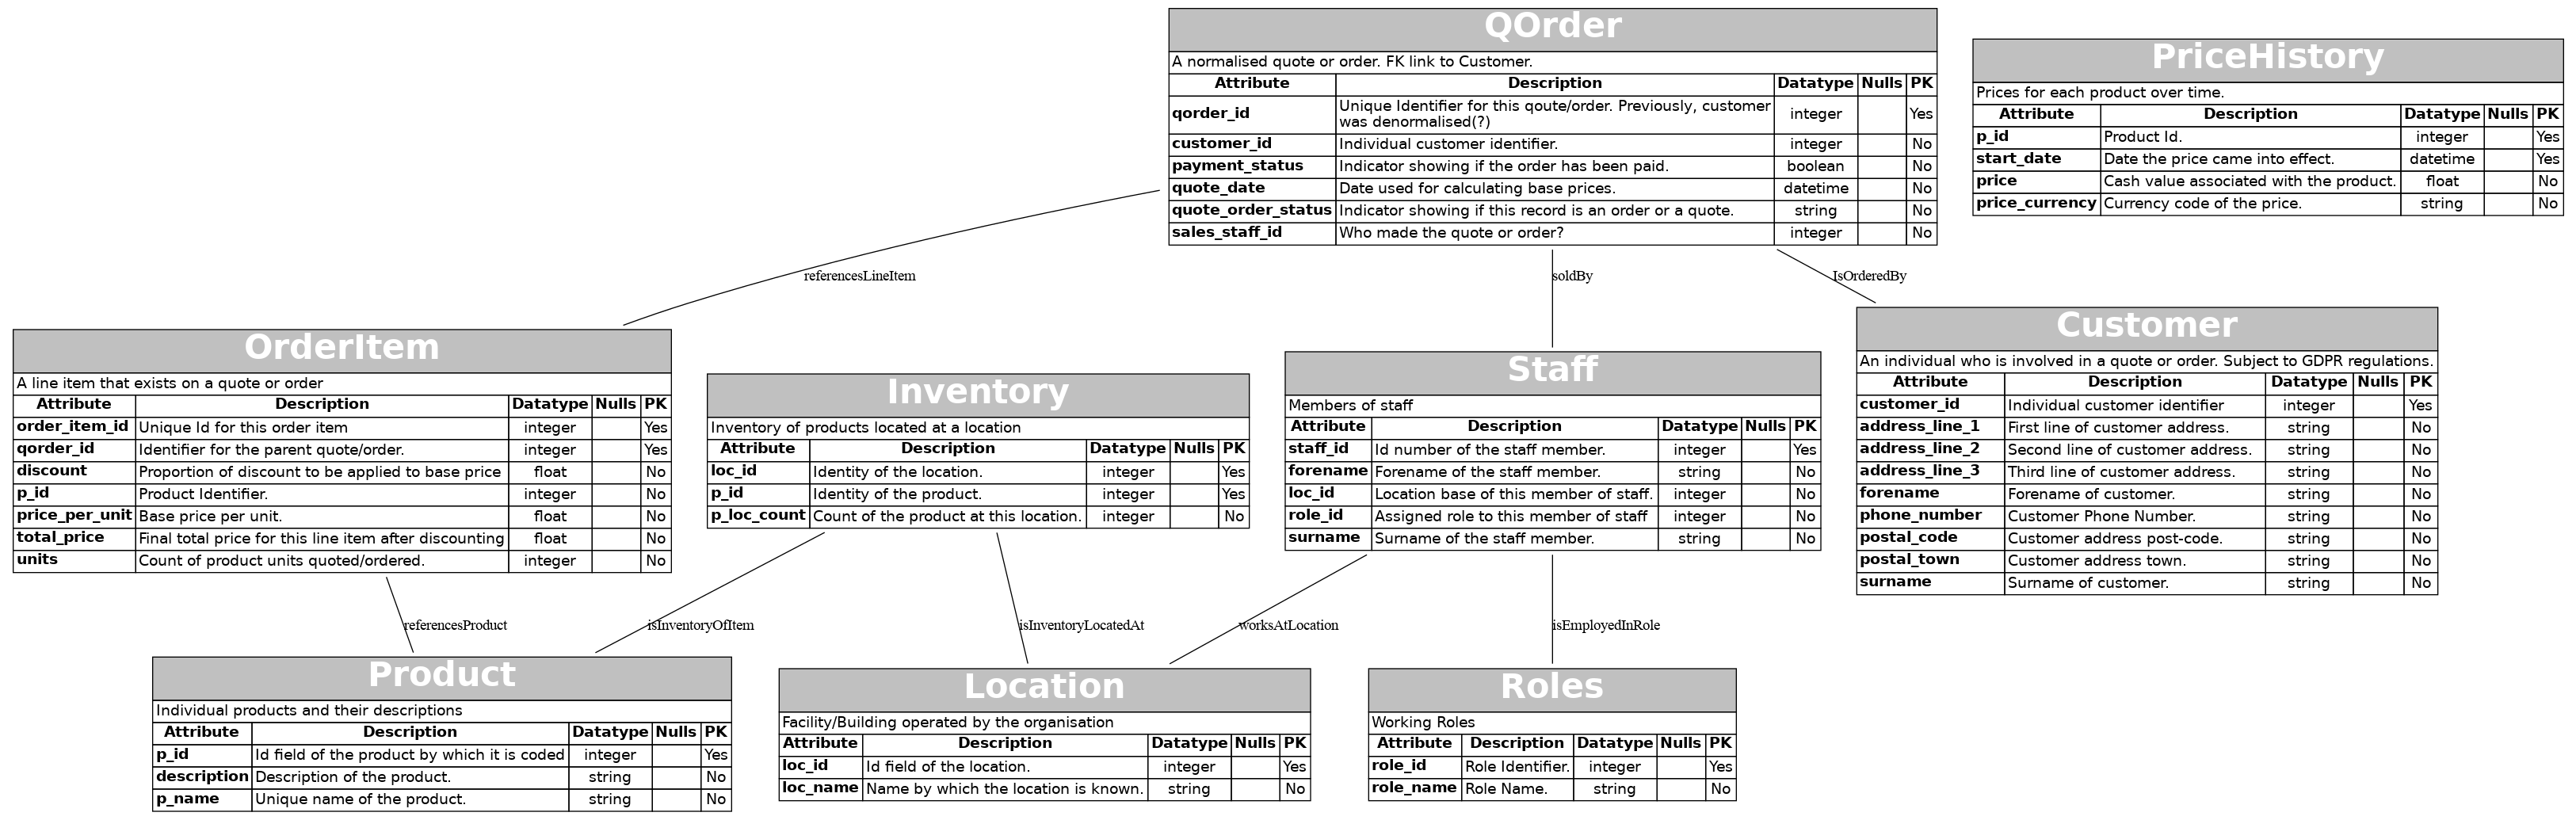

In [42]:
from IPython.display import Image
Image(dot.pipe(format="png", engine="dot"))

In [43]:
def dot_table_to_png(id,tab_def):
    dot = graphviz.Graph()
    dot.node_attr['fontname']="DejaVu Sans"
    dot.node(id, label=tab_def, shape="plaintext")
    src = dot.pipe(format="dot").decode()
    return dot.pipe(format="png", engine="dot"),src

In [44]:
import gravis as gv
import networkx as nx
import base64
from io import BytesIO
import re

In [45]:
find_bb_rx=re.compile("\[bb=\"([\d}]{1,6}),([\d}]{1,6}),([\d}]{1,6}),([\d}]{1,6})\"\]")

''
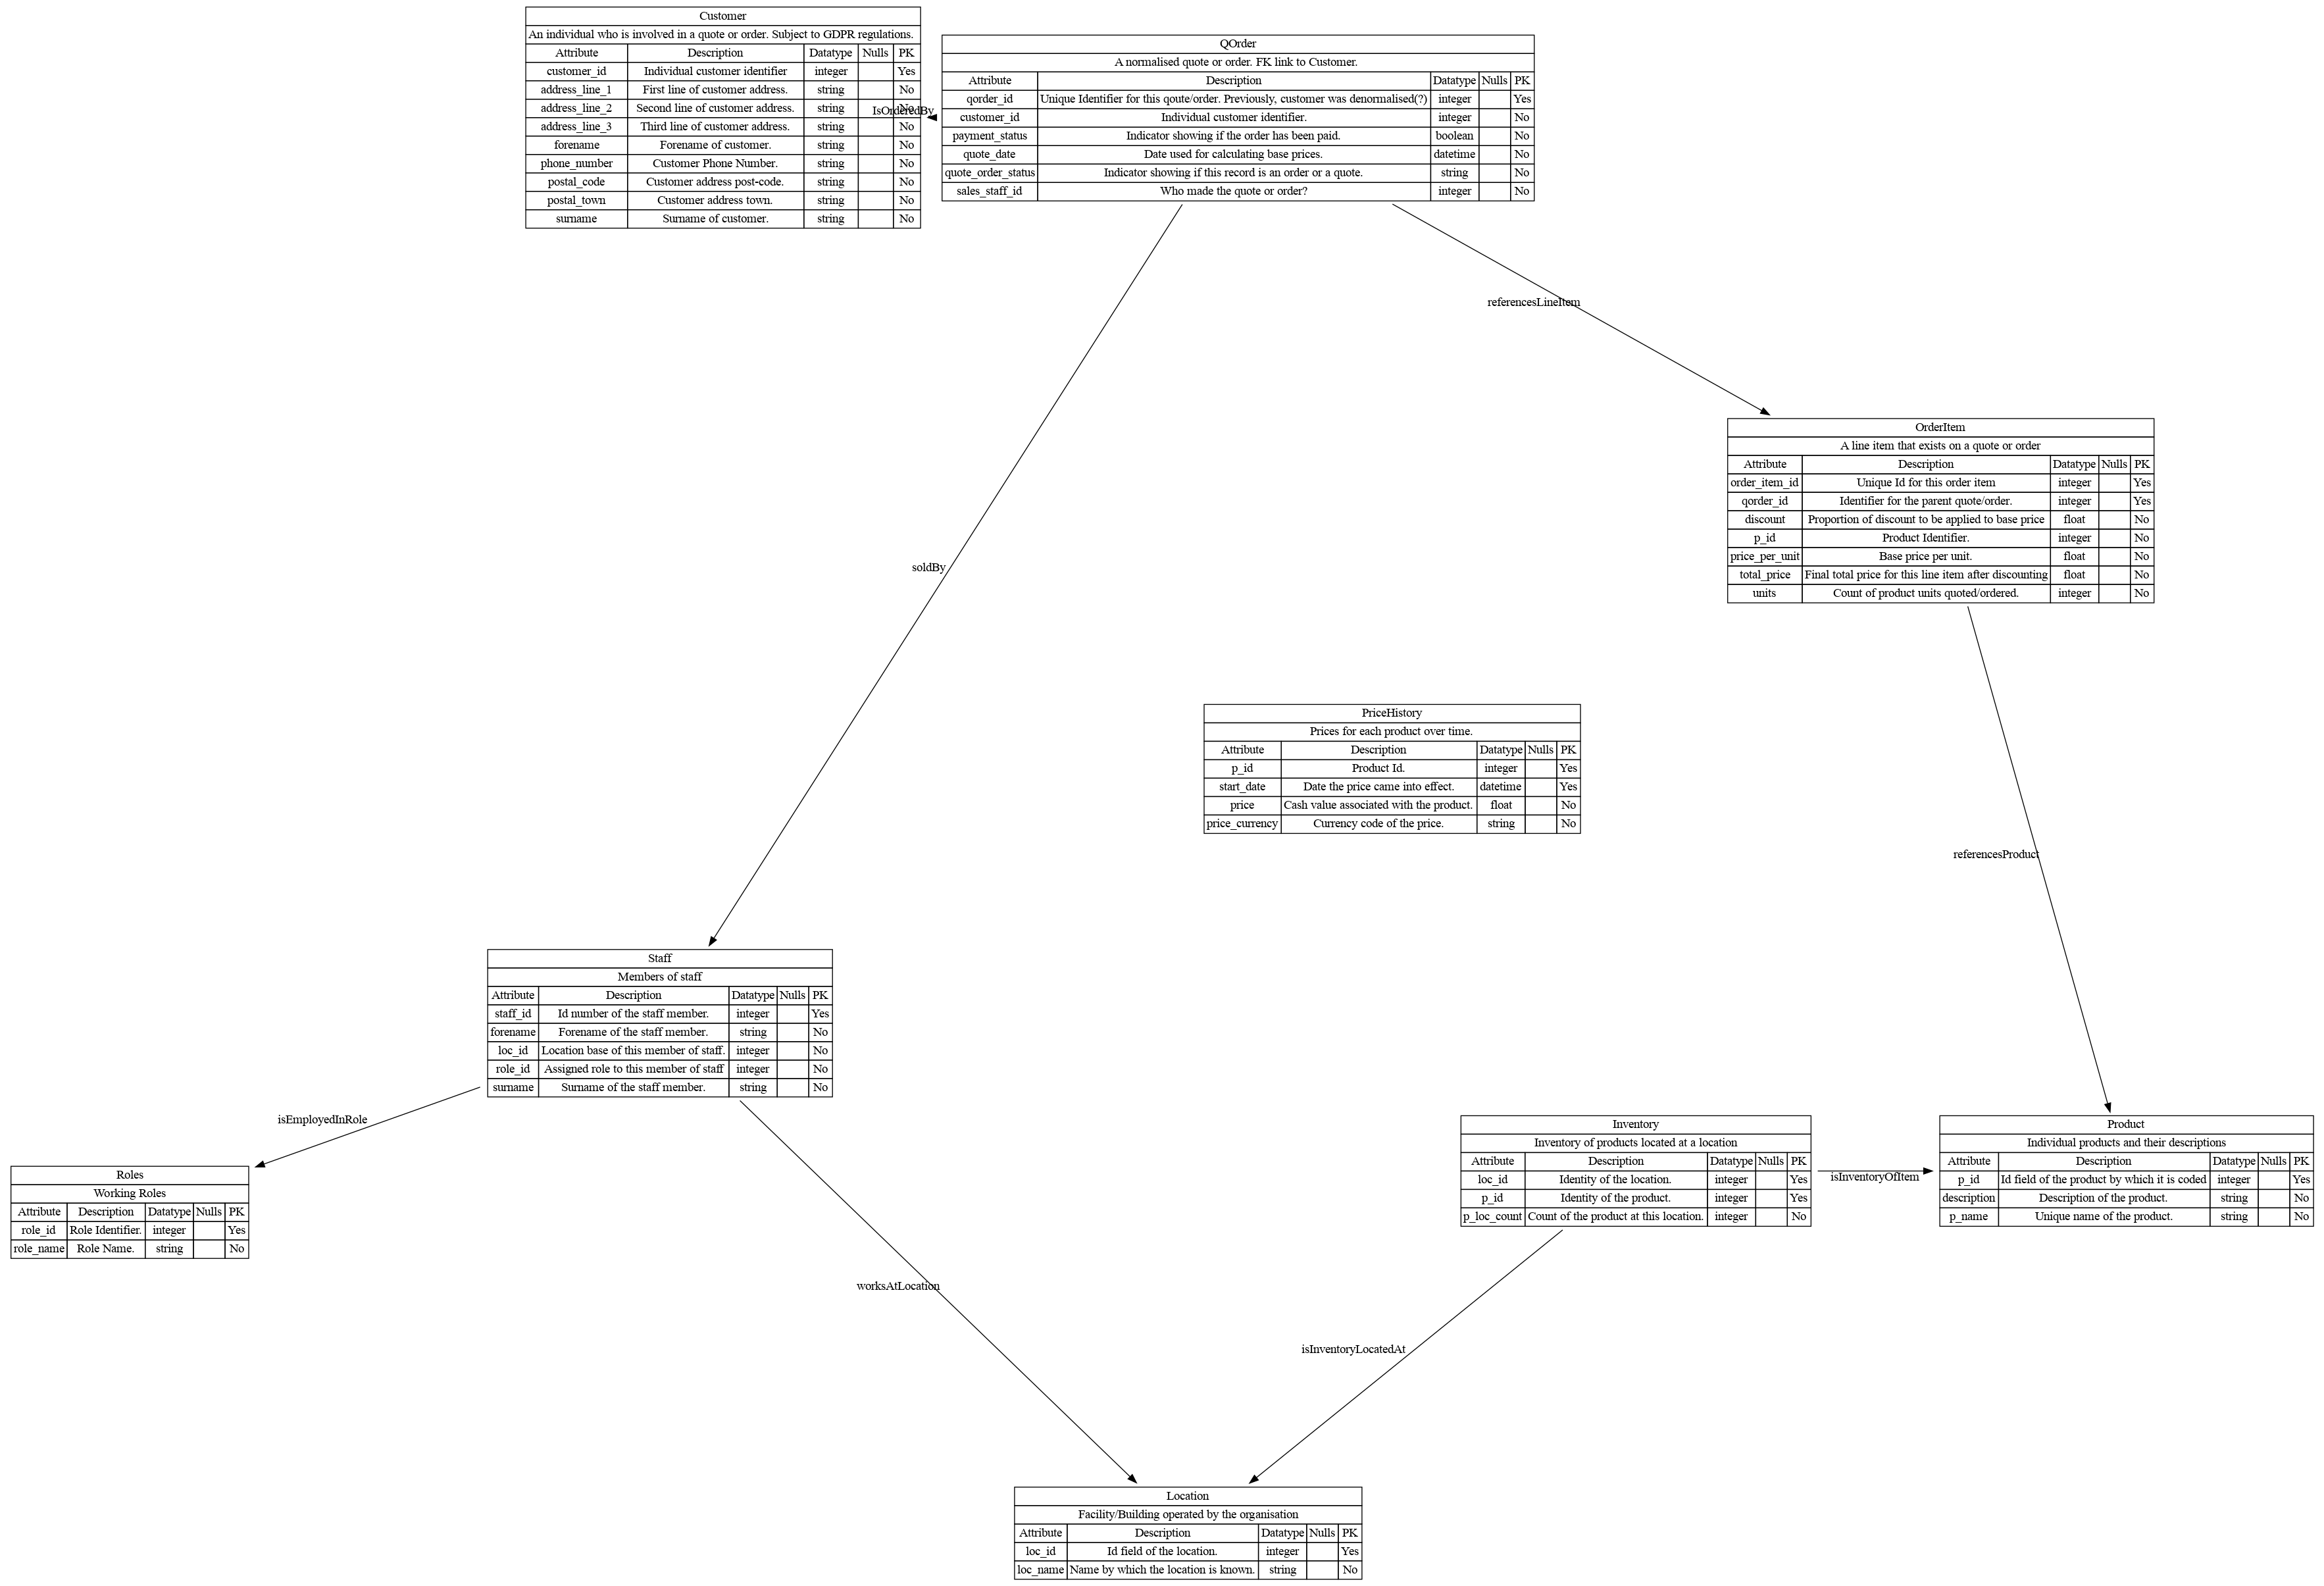

In [46]:
svg_image=gv.convert.image_to_data_url("Source.gv.png")
svg_image



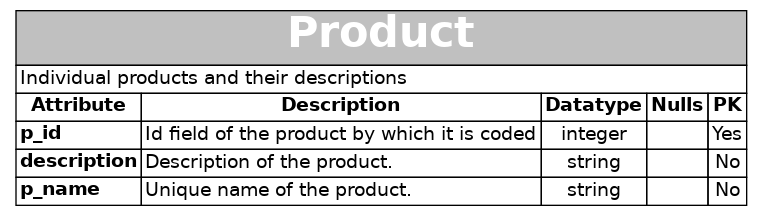
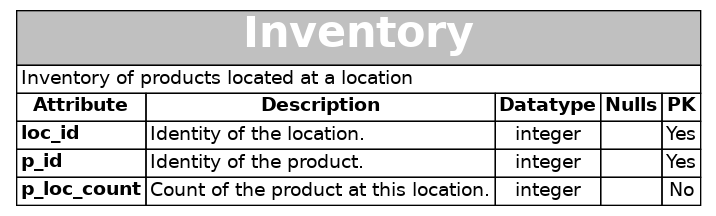
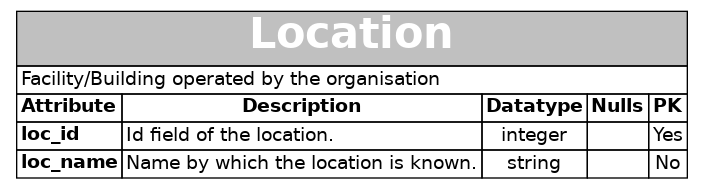
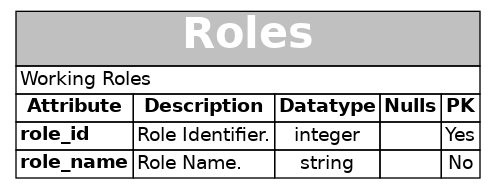
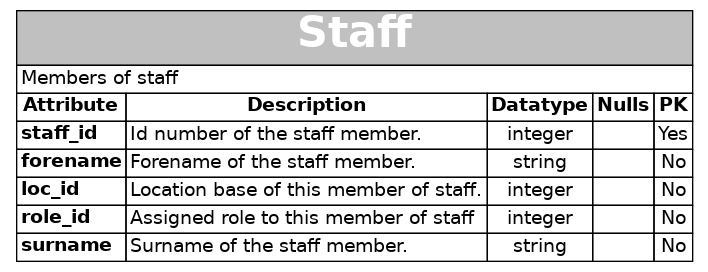
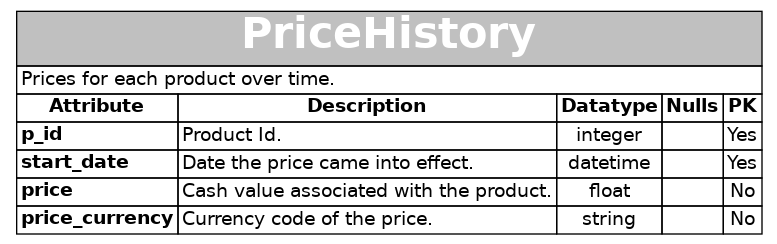
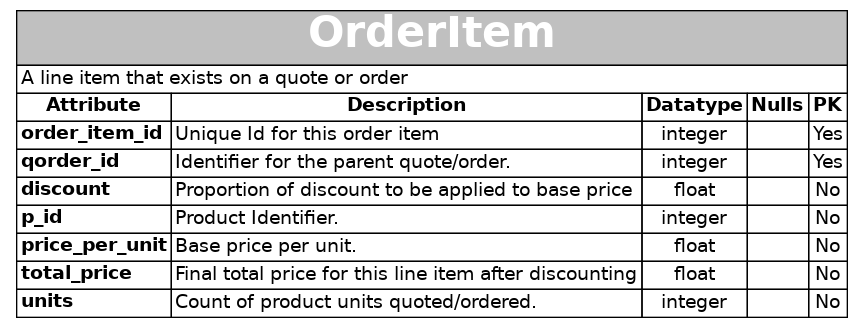
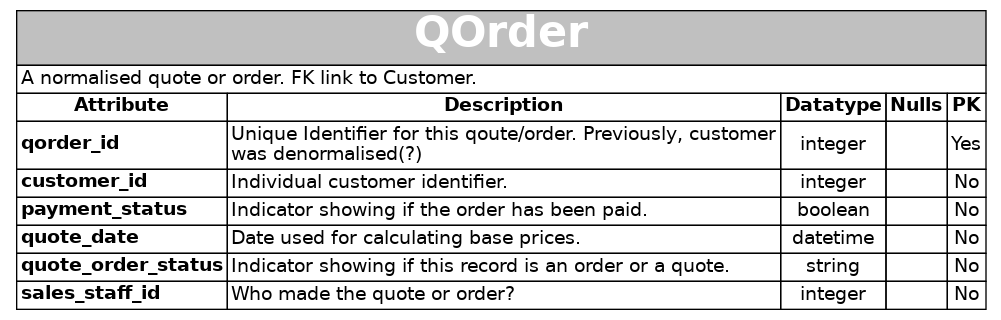
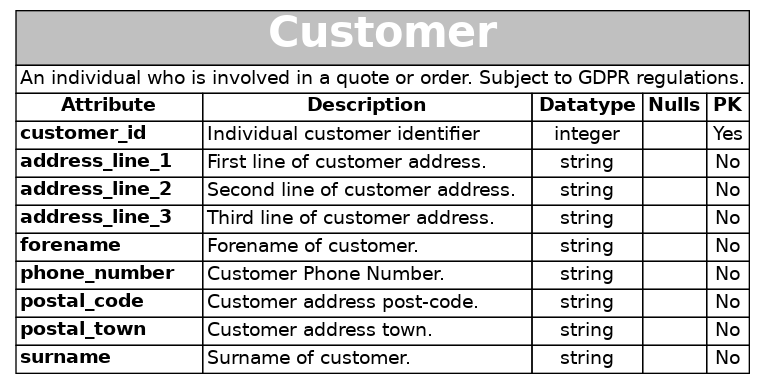

In [47]:
nx_g = nx.MultiDiGraph()
nx_g = nx.MultiGraph()

for k,t in class_tables.items():
    png,src=dot_table_to_png(k,t)
    table_image_data_url = """data:image/png;base64,{d}""".format(d=base64.b64encode(png).decode("utf-8"))
    x,y,w,h=[int(i)/5 for i in find_bb_rx.search(src).groups()]
    nx_g.add_node(k, label=k, **{"color" : "white", "shape" : "rectangle", "image" : table_image_data_url, "size":max([w,h])})

for r,v in rel_dict.items():
    #print(v['fromclass'][0].toPython(), v['toclass'][0].toPython(), v['label'][0].toPython())
    nx_g.add_edge(uriref2loc(v['fromclass'][0]), uriref2loc(v['toclass'][0]), label=v['label'][0].toPython(), constraint='true')
    
gjgf = gv.convert.networkx_to_gjgf(nx_g)


model_html = gv.d3(gjgf, 
      node_label_data_source='label',
      show_edge_label=True,
      edge_label_size_factor=1.0,
      edge_label_data_source='label',
    node_image_size_factor=5,
    node_size_factor=0.20,
    show_node_label=False,
      edge_curvature=0.25,
    links_force_strength=0.25, 
     links_force_distance=250, 
     use_collision_force=True, 
     collision_force_radius=30, 
    collision_force_strength=30.0,
     many_body_force_strength=-1300,
                   many_body_force_theta=0.56, 
                   use_many_body_force_min_distance=False,
                   many_body_force_min_distance=0.01,
                   use_many_body_force_max_distance=False,
                   many_body_force_max_distance=40000,
                   use_x_positioning_force=False,
                   x_positioning_force_strength=0.21,
                   use_y_positioning_force=False,
                   y_positioning_force_strength=0.21
     ).to_html_partial()

HTML(model_html)


In [48]:
def test_rs_suitable_for_graph_construction(rs):
    field_names = [f.toPython().replace("?","") for f in rs.vars]
    valid_field_set={'s','p','o','subject','predicate','object'}
    print(field_names, valid_field_set)
    test_rs_has_3_fields=len(rs.vars)==3
    test_rs_has_appropriate_field_names=all([f in valid_field_set for f in field_names])
    return test_rs_has_3_fields and test_rs_has_appropriate_field_names

In [49]:
test_rs_suitable_for_graph_construction(rs)

['s', 'p', 'o'] {'subject', 'p', 'predicate', 'object', 's', 'o'}


True

In [50]:
rs.vars

[rdflib.term.Variable('s'),
 rdflib.term.Variable('p'),
 rdflib.term.Variable('o')]

In [51]:
type(rs)

rdflib.plugins.sparql.results.xmlresults.XMLResult

In [52]:
rs.__class__

rdflib.plugins.sparql.results.xmlresults.XMLResult

In [56]:
isinstance(rs, Result)

True

In [57]:
querytext = """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX owl: <http://www.w3.org/2002/07/owl#> 

select ?g ?p (COUNT (?p) as ?triples)
    WHERE
    {GRAPH ?g { ?s ?p ?o. }
}
GROUP BY ?g ?p
ORDER BY ?g ?p
"""
q = querytext
rs=repo.run_adhoc_query(q)

In [59]:
rs[0]

{'g': 'http://config',
 'p': 'http://www.tkltd.org/ontologies/serialization#ContainsMapping',
 'triples': 62}